In [1]:
import numpy as pd
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [3]:
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df = df.set_index(['date'])

In [4]:
df.tail()

,state,fips,cases,deaths
date,,,,
2021-01-23,Virginia,51,468655,6079
2021-01-23,Washington,53,304107,4182
2021-01-23,West Virginia,54,114752,1872
2021-01-23,Wisconsin,55,580003,6187
2021-01-23,Wyoming,56,50583,571


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17999 entries, 2020-01-21 to 2021-01-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   17999 non-null  object
 1   fips    17999 non-null  int64 
 2   cases   17999 non-null  int64 
 3   deaths  17999 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 703.1+ KB


In [6]:
df.describe()

,fips,cases,deaths
count,17999.000000,1.799900e+04,17999.000000
mean,31.913162,1.250905e+05,3065.934163
std,18.641385,2.412871e+05,5671.937642
min,1.000000,1.000000e+00,0.000000
25%,17.000000,4.853500e+03,103.000000
50%,31.000000,3.583400e+04,806.000000
75%,46.000000,1.388470e+05,3438.000000
max,78.000000,3.163830e+06,41694.000000


In [7]:
df['mortality'] =  df['deaths']/df['cases']*100
df

,state,fips,cases,deaths,mortality
date,,,,,
2020-01-21,Washington,53,1,0,0.000000
2020-01-22,Washington,53,1,0,0.000000
2020-01-23,Washington,53,1,0,0.000000
2020-01-24,Illinois,17,1,0,0.000000
2020-01-24,Washington,53,1,0,0.000000
...,...,...,...,...,...
2021-01-23,Virginia,51,468655,6079,1.297116
2021-01-23,Washington,53,304107,4182,1.375174
2021-01-23,West Virginia,54,114752,1872,1.631344


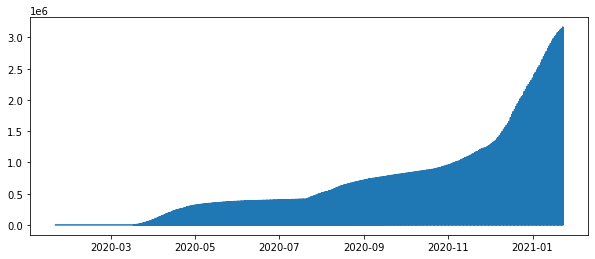

In [8]:
plt.figure(figsize=(10,4))
plt.plot(df['cases'])

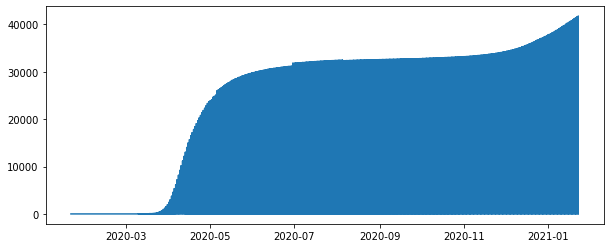

In [9]:
plt.figure(figsize=(10,4))
plt.plot(df['deaths'])

In [10]:
cases = df.groupby('date')['cases'].sum()
cases = pd.DataFrame(cases)
cases

,cases
date,
2020-01-21,1
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,3
...,...
2021-01-19,24311264
2021-01-20,24497499
2021-01-21,24688129


In [11]:
deaths = df.groupby('date')['deaths'].sum()
death = pd.DataFrame(deaths)
death

,deaths
date,
2020-01-21,0
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
...,...
2021-01-19,401824
2021-01-20,406194
2021-01-21,410336


In [12]:
#!pip install pandas-profiling
import pandas_profiling as pf

pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

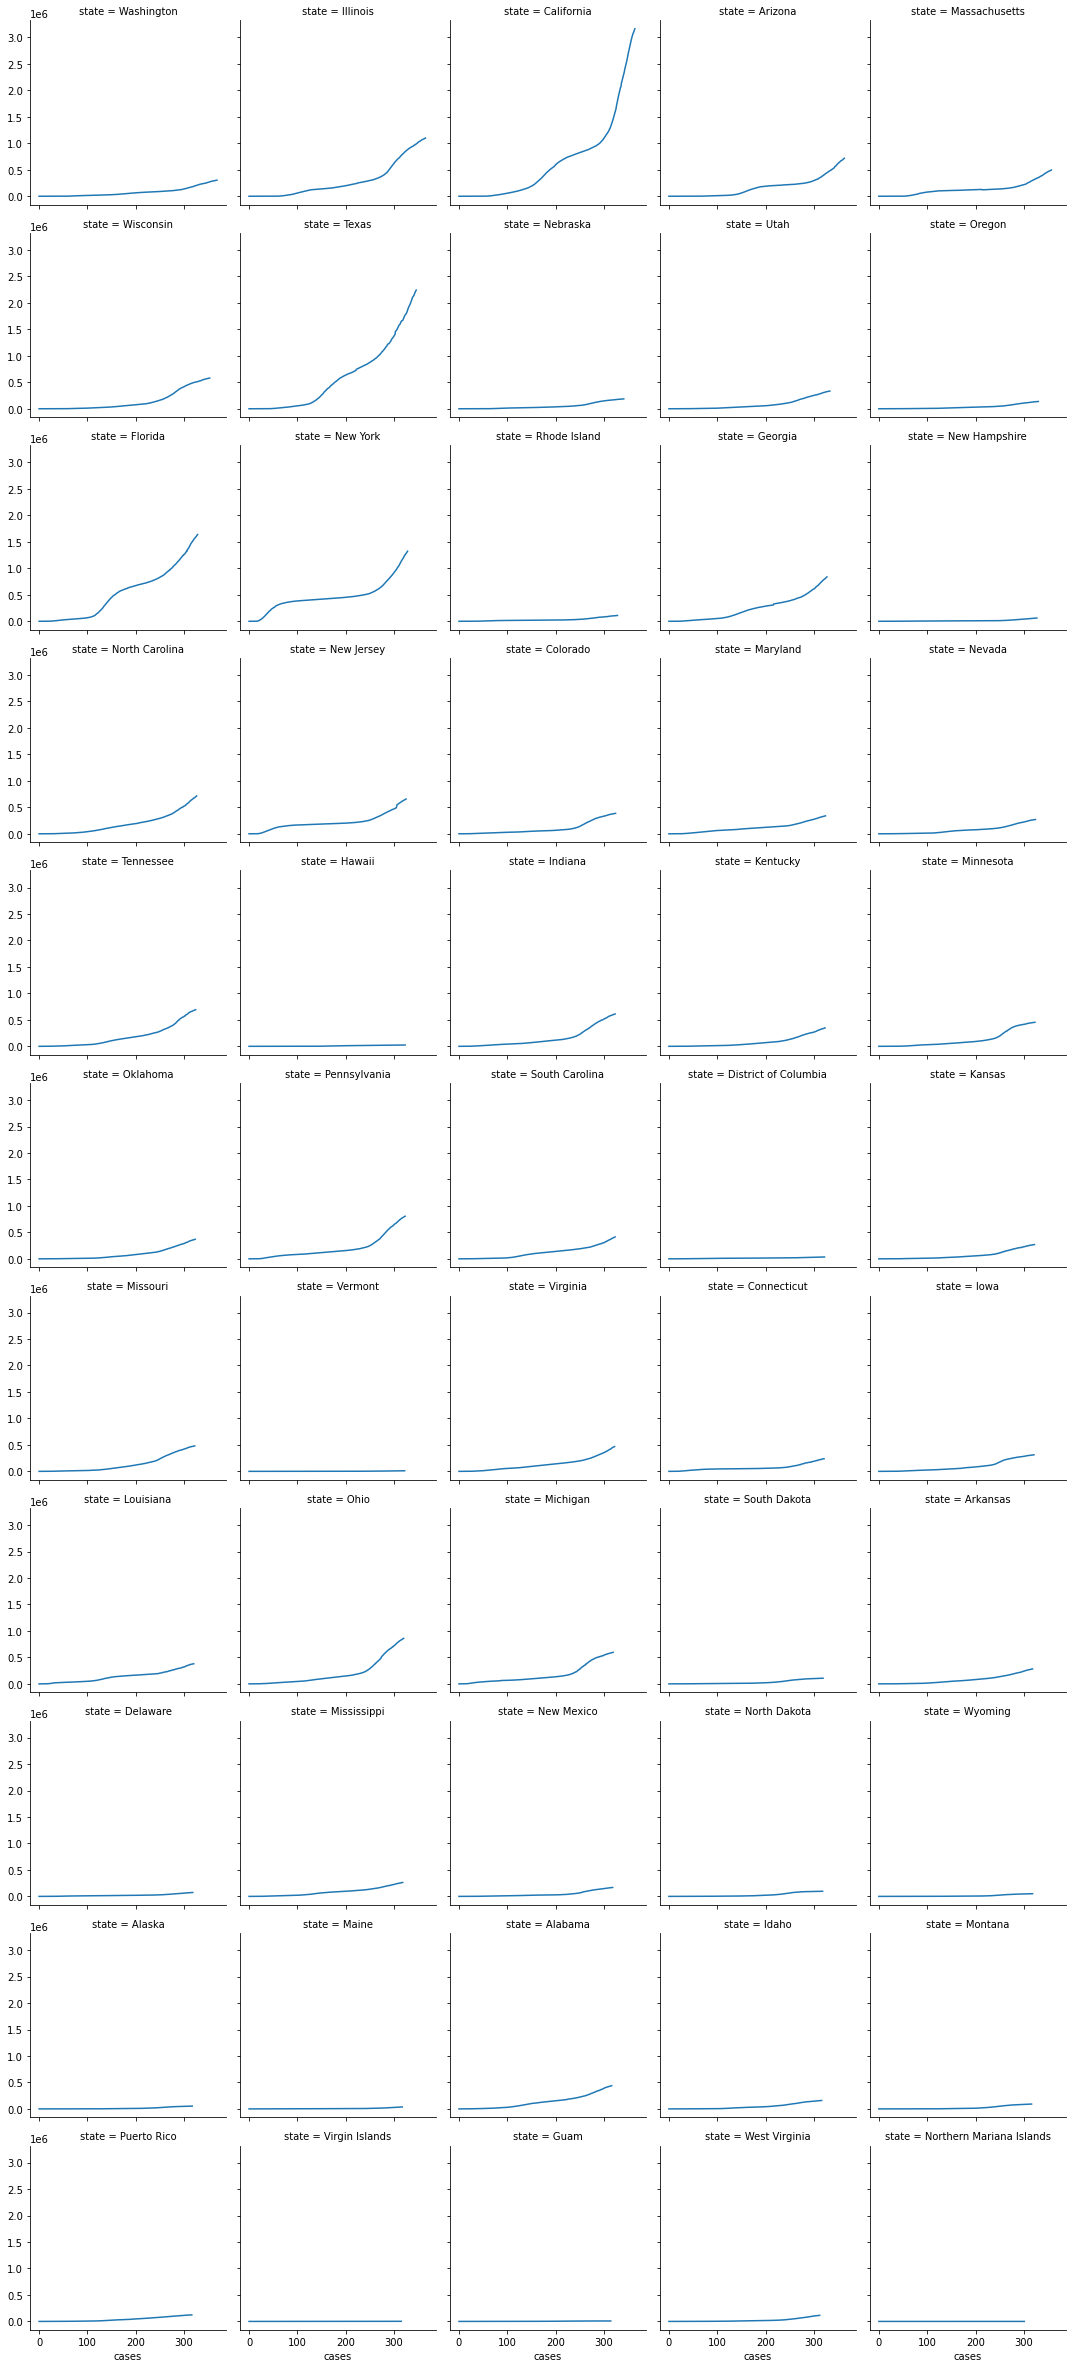

In [13]:
state_cases_graph = sns.FacetGrid(df,col="state", col_wrap=5, height=3)
state_cases_graph = state_cases_graph.map(plt.plot, "cases")

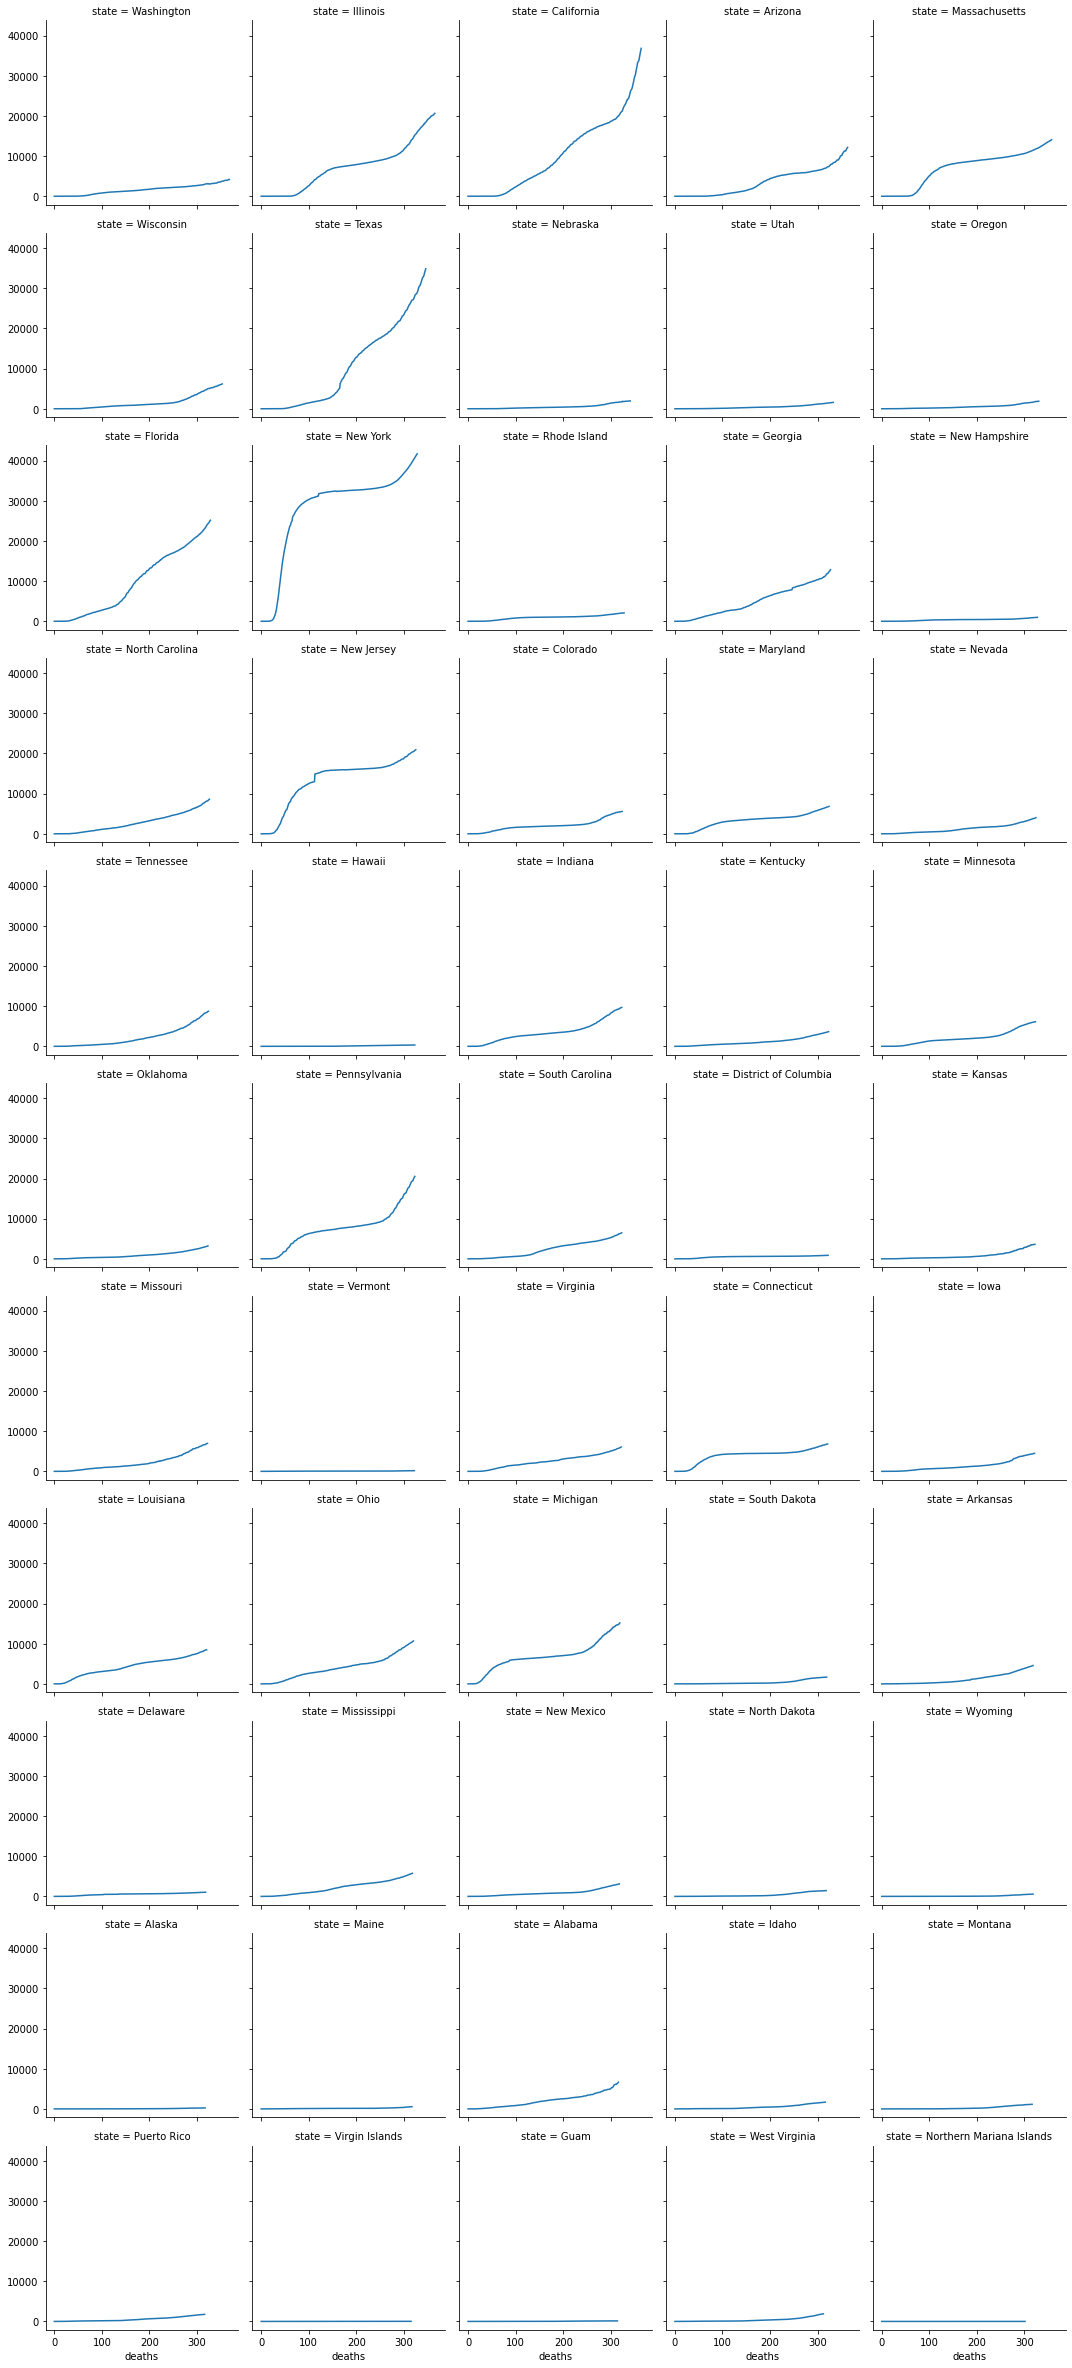

In [14]:
state_deaths_graph = sns.FacetGrid(df,col="state", col_wrap=5, height=3)
state_deaths_graph = state_deaths_graph.map(plt.plot, "deaths")

In [15]:
df = df.drop('state',axis=1)
df

,fips,cases,deaths,mortality
date,,,,
2020-01-21,53,1,0,0.000000
2020-01-22,53,1,0,0.000000
2020-01-23,53,1,0,0.000000
2020-01-24,17,1,0,0.000000
2020-01-24,53,1,0,0.000000
...,...,...,...,...
2021-01-23,51,468655,6079,1.297116
2021-01-23,53,304107,4182,1.375174
2021-01-23,54,114752,1872,1.631344


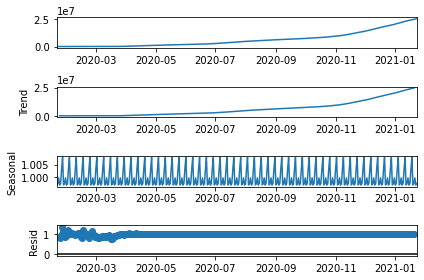

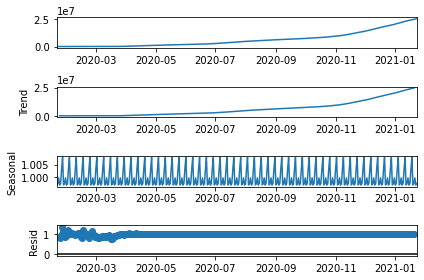

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose 

seasonal_graph_for_cases = seasonal_decompose(cases, model ='multiplicative') 
seasonal_graph_for_cases.plot() 

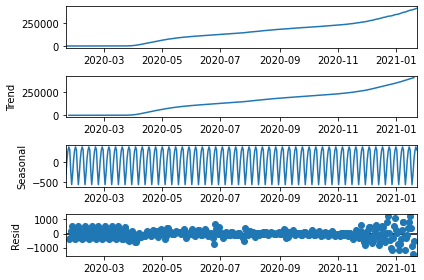

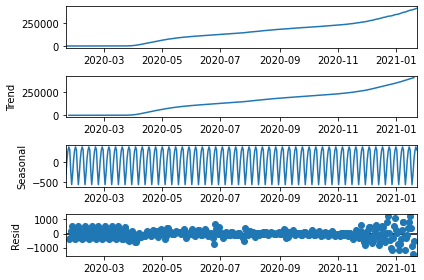

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose 

seasonal_graph_for_death = seasonal_decompose(death, model ='additive') 
seasonal_graph_for_death.plot() 

## ARIMA for Cases

In [18]:
from statsmodels.tsa.arima_model import ARIMA

train_cases = cases.iloc[:300] 
test_cases = cases.iloc[300:]
  
arima_cases_model = ARIMA(train_cases,  
                        order = (1,1,2)
                       )

arima_cases_result = arima_cases_model.fit() 
arima_cases_result.summary() 

C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.cases   No. Observations:                  299
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3046.407
Method:                       css-mle   S.D. of innovations           6383.455
Date:                Sun, 24 Jan 2021   AIC                           6102.814
Time:                        20:03:37   BIC                           6121.316
Sample:                    01-22-2020   HQIC                          6110.220
                         - 11-15-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.717e+04      8e+04      0.464      0.642    -1.2e+05    1.94e+05
ar.L1.D.cases     0.9984      0.003    346.233      0.000       0.993       1.004
ma.L1.D.cases    -0.1294      0.055     -2.370      0.018      -0.236      -0.022
ma.L2.D.cases    -0.2570      0.050     -5.150      0.000      -0.355      -0.159
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0016           +0.0000j            1.0016            0.0000
MA.1            1.7367           +0.0000j            1.7367            0.0000
MA.2           -2.2402           +0.0000j            2.2402            0.5000
-----------------------------------------------------------------------------
"""

2020-11-16    1.125445e+07
2020-11-17    1.140004e+07
2020-11-18    1.154545e+07
2020-11-19    1.169068e+07
2020-11-20    1.183574e+07
                  ...     
2021-01-19    2.023133e+07
2021-01-20    2.036629e+07
2021-01-21    2.050109e+07
2021-01-22    2.063574e+07
2021-01-23    2.077022e+07
Freq: D, Name: Predictions, Length: 69, dtype: float64


<AxesSubplot:xlabel='date'>

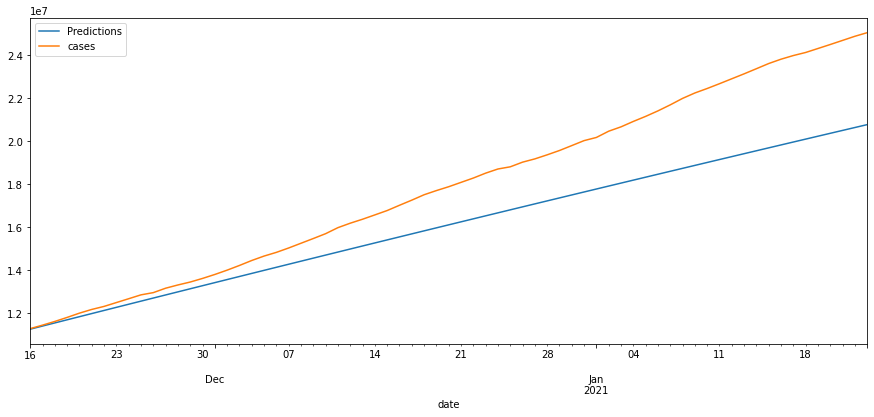

In [19]:
start = len(train_cases) 
end = len(train_cases) + len(test_cases) - 1
  
arima_cases_predictions = arima_cases_result.predict(start, end, 
                            typ = 'levels').rename("Predictions") 
print (arima_cases_predictions)
plt.figure(figsize=(15,6))
arima_cases_predictions.plot(legend = True) 
test_cases['cases'].plot(legend = True)

C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='date'>

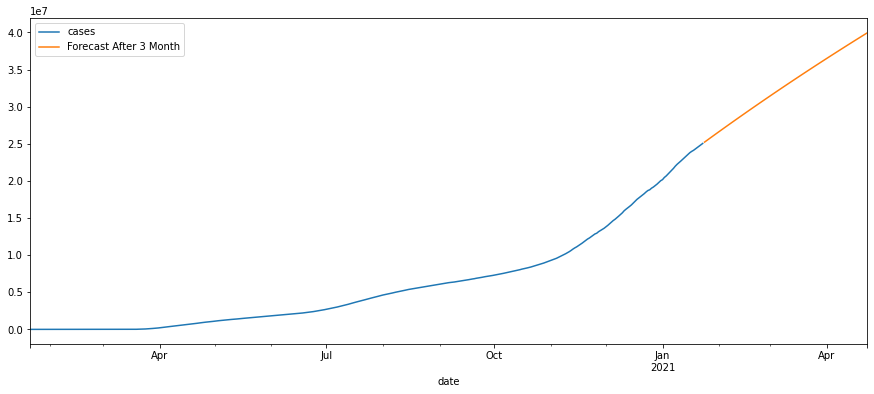

In [20]:
arima_cases_all_model = arima_cases_all_model = ARIMA(cases,  
                                                      order = (1, 1, 2)  
                                                        ) 
arima_all_data_result = arima_cases_all_model.fit() 
  
arima_cases_for_future = arima_all_data_result.predict(start = len(cases),  
                          end = (len(cases)-1) + 90,  
                          typ = 'levels').rename('Forecast After 3 Month') 
  
cases.plot(figsize = (15, 6), legend = True) 
arima_cases_for_future.plot(legend = True) 

## ARIMA for Death

In [21]:
from statsmodels.tsa.arima_model import ARIMA

train_death = death.iloc[:300] 
test_death = death.iloc[300:]
  
arima_death_model = ARIMA(train_death,  
                        order = (1,1,2)
                       ) 
  
arima_death_result = arima_death_model.fit() 
arima_death_result.summary() 

C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.deaths   No. Observations:                  299
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2137.503
Method:                       css-mle   S.D. of innovations            306.954
Date:                Sun, 24 Jan 2021   AIC                           4285.005
Time:                        20:03:38   BIC                           4303.507
Sample:                    01-22-2020   HQIC                          4292.411
                         - 11-15-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            735.2969    311.533      2.360      0.018     124.704    1345.889
ar.L1.D.deaths     0.9835      0.011     91.929      0.000       0.963       1.005
ma.L1.D.deaths    -0.2553      0.051     -4.989      0.000      -0.356      -0.155
ma.L2.D.deaths    -0.4087      0.046     -8.860      0.000      -0.499      -0.318
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0167           +0.0000j            1.0167            0.0000
MA.1            1.2828           +0.0000j            1.2828            0.0000
MA.2           -1.9076           +0.0000j            1.9076            0.5000
-----------------------------------------------------------------------------
"""

2020-11-16    246866.950590
2020-11-17    247847.557767
2020-11-18    248824.126035
2020-11-19    249796.721893
2020-11-20    250765.410744
                  ...      
2021-01-19    303676.218451
2021-01-20    304496.292442
2021-01-21    305314.970622
2021-01-22    306132.275971
2021-01-23    306948.231092
Freq: D, Name: Predictions, Length: 69, dtype: float64


<AxesSubplot:xlabel='date'>

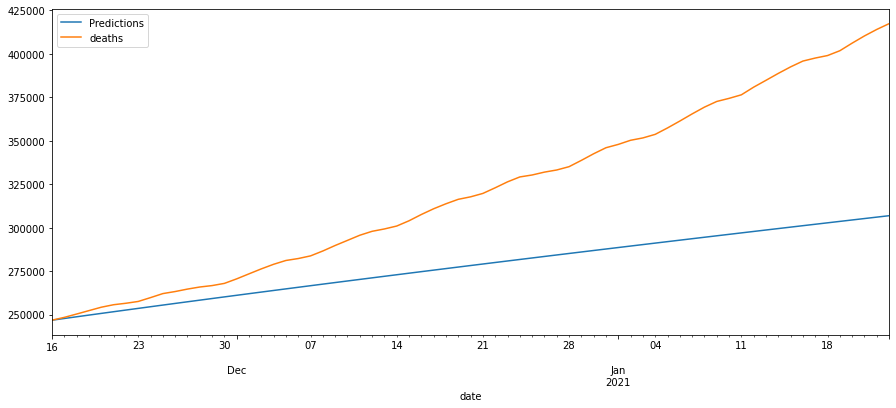

In [22]:
start = len(train_death) 
end = len(train_death) + len(test_death) - 1
  
arima_death_predictions = arima_death_result.predict(start, end, 
                            typ = 'levels').rename("Predictions") 
print (arima_death_predictions)
plt.figure(figsize=(15,6))
arima_death_predictions.plot(legend = True) 
test_death['deaths'].plot(legend = True)

C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='date'>

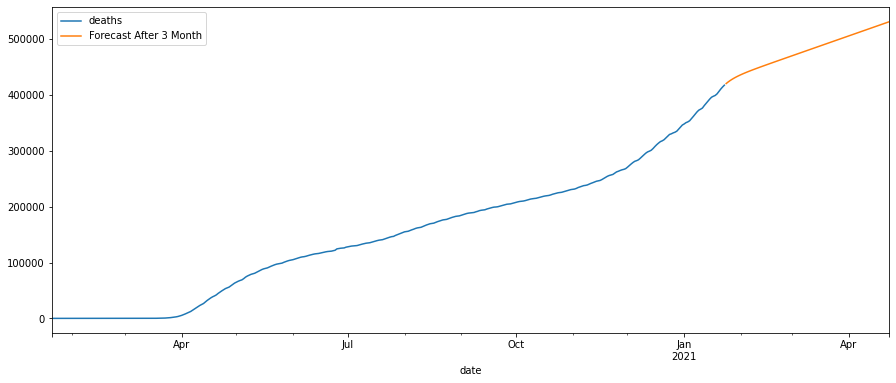

In [23]:
arima_deaths_all_model = arima_deaths_all_model = ARIMA(death,  
                                                        order = (1, 1, 1),  
                                                        ) 
arima_all_data_death_result = arima_deaths_all_model.fit() 
  
arima_deaths_for_future = arima_all_data_death_result.predict(start = len(death),  
                                                             end = (len(death)-1) + 90,  
                                                             typ = 'levels').rename('Forecast After 3 Month') 
  
death.plot(figsize = (15, 6), legend = True) 
arima_deaths_for_future.plot(legend = True) 

## SARIMA for Cases

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_cases = cases.iloc[:300] 
test_cases = cases.iloc[300:]
  
sarima_case_model = SARIMAX(train_cases,  
                            order = (1,1,2),
                            seasonal_order =(1, 1, 1, 12)
                           ) 
  
sarima_case_result = sarima_case_model.fit() 
sarima_case_result.summary() 

C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                cases   No. Observations:                  300
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -2957.794
Date:                              Sun, 24 Jan 2021   AIC                           5927.588
Time:                                      20:03:41   BIC                           5949.545
Sample:                                  01-21-2020   HQIC                          5936.388
                                       - 11-15-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.016     60.740      0.000       0.968       1.032
ma.L1         -0.1335      0.069     -1.937      0.053      -0.269       0.002
ma.L2         -0.2055      0.087     -2.360      0.018      -0.376      -0.035
ar.S.L12      -0.1352      0.092     -1.462      0.144      -0.316       0.046
ma.S.L12      -1.0000      0.096    -10.421      0.000      -1.188      -0.812
sigma2      7.365e+07   1.32e-09   5.59e+16      0.000    7.37e+07    7.37e+07
===================================================================================
Ljung-Box (Q):                      421.49   Jarque-Bera (JB):                96.96
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              17.93   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.78e+32. Standard errors may be unstable.
"""

2020-11-16    1.125346e+07
2020-11-17    1.139469e+07
2020-11-18    1.153385e+07
2020-11-19    1.167399e+07
2020-11-20    1.181730e+07
                  ...     
2021-01-19    2.014561e+07
2021-01-20    2.028411e+07
2021-01-21    2.042375e+07
2021-01-22    2.056246e+07
2021-01-23    2.070228e+07
Freq: D, Name: Predictions, Length: 69, dtype: float64


<AxesSubplot:xlabel='date'>

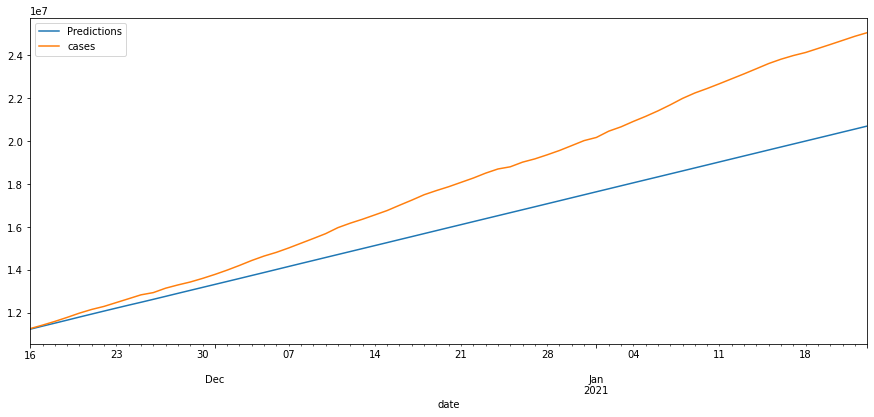

In [25]:
start = len(train_cases) 
end = len(train_cases) + len(test_cases) - 1
  
sarima_case_prediction = sarima_case_result.predict(start, end, 
                            typ = 'levels').rename("Predictions") 
print (sarima_case_prediction)
plt.figure(figsize=(15,6))
sarima_case_prediction.plot(legend = True) 
test_cases['cases'].plot(legend = True)

C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='date'>

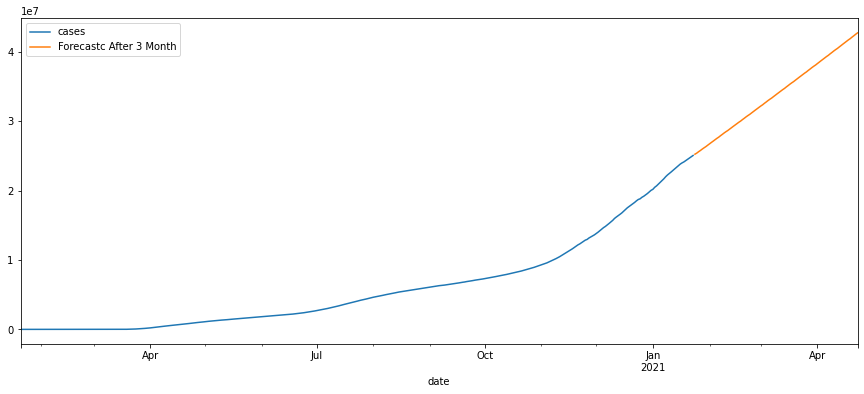

In [26]:
sarima_cases_all_model = sarima_cases_all_model = SARIMAX(cases,  
                                                          order = (1, 1, 2),  
                                                          seasonal_order =(1, 1, 1, 12)) 
sarima_all_data_case_result = sarima_cases_all_model.fit() 
  
sarima_cases_for_future = sarima_all_data_case_result.predict(start = len(cases),  
                          end = (len(cases)-1) + 90,  
                          typ = 'levels').rename('Forecastc After 3 Month') 
  
cases.plot(figsize = (15, 6), legend = True) 
sarima_cases_for_future.plot(legend = True) 

## SARIMA for Death

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_death = death.iloc[:300] 
test_death = death.iloc[300:]
  
sarima_death_model = SARIMAX(train_death,  
                            order = (1,1,2),
                            seasonal_order =(1, 1, 2, 12)
                            ) 
  
sarima_death_result = sarima_death_model.fit() 
sarima_death_result.summary() 

C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             deaths   No. Observations:                  300
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -2071.446
Date:                            Sun, 24 Jan 2021   AIC                           4156.892
Time:                                    20:03:47   BIC                           4182.509
Sample:                                01-21-2020   HQIC                          4167.159
                                     - 11-15-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.083     12.007      0.000       0.837       1.163
ma.L1         -0.2533      0.037     -6.880      0.000      -0.325      -0.181
ma.L2         -0.4252      0.044     -9.740      0.000      -0.511      -0.340
ar.S.L12      -0.9999     10.267     -0.097      0.922     -21.123      19.123
ma.S.L12     -5.1e-05     16.081  -3.17e-06      1.000     -31.518      31.518
ma.S.L24      -0.9999     10.338     -0.097      0.923     -21.263      19.263
sigma2      9.657e+04      0.000   3.62e+08      0.000    9.66e+04    9.66e+04
===================================================================================
Ljung-Box (Q):                      595.42   Jarque-Bera (JB):               274.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                             0.56
Prob(H) (two-sided):                  0.54   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.33e+26. Standard errors may be unstable.
"""

2020-11-16    246996.602974
2020-11-17    248009.487601
2020-11-18    248996.636382
2020-11-19    249971.228028
2020-11-20    250957.195744
                  ...      
2021-01-19    311758.135720
2021-01-20    312749.437346
2021-01-21    313747.011893
2021-01-22    314790.296290
2021-01-23    315815.706688
Freq: D, Name: Predictions, Length: 69, dtype: float64


<AxesSubplot:xlabel='date'>

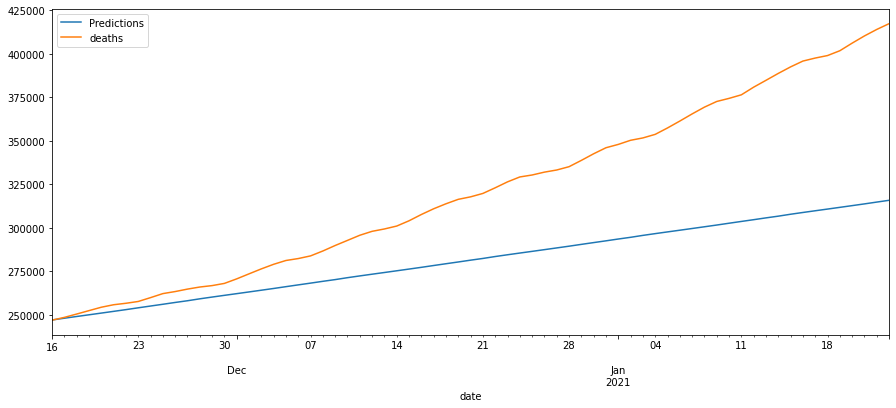

In [28]:
start = len(train_death) 
end = len(train_death) + len(test_death) - 1
  
sarima_death_prediction = sarima_death_result.predict(start, end, 
                                          typ = 'levels').rename("Predictions") 
print (sarima_death_prediction)
plt.figure(figsize=(15,6))
sarima_death_prediction.plot(legend = True) 
test_death['deaths'].plot(legend = True)

C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='date'>

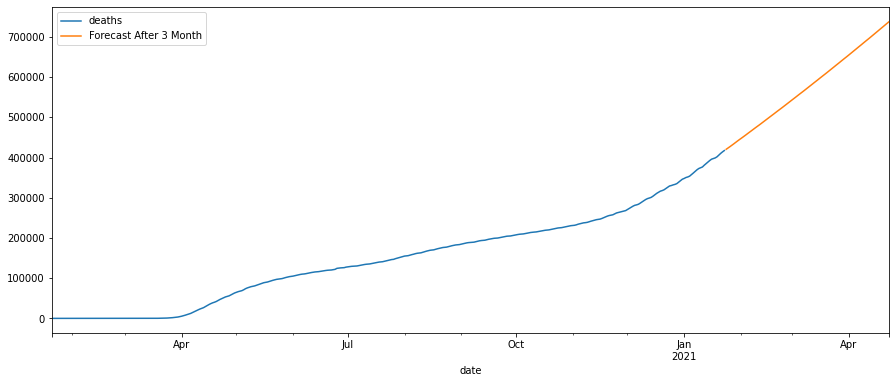

In [29]:
sarima_deaths_all_model = sarima_deaths_all_model = SARIMAX(death,  
                                                          order = (1, 1, 2),  
                                                          seasonal_order =(1, 1, 1, 12)) 
sarima_all_data_case_result = sarima_deaths_all_model.fit() 
  
sarima_deaths_for_future = sarima_all_data_case_result.predict(start = len(death),  
                          end = (len(death)-1) + 90,  
                          typ = 'levels').rename('Forecast After 3 Month') 
  
death.plot(figsize = (15, 6), legend = True) 
sarima_deaths_for_future.plot(legend = True) 

## AutoArima for Hyperparameter

In [30]:
from pmdarima import auto_arima 
  
fit_best_parameter_for_cases_model = auto_arima(cases, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore', 
                          suppress_warnings = True,  
                          stepwise = True)            
  
fit_best_parameter_for_cases_model.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=8055.393, BIC=8074.768, Time=0.538 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=8338.018, BIC=8345.768, Time=0.026 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=8121.903, BIC=8137.402, Time=0.418 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=8223.444, BIC=8238.943, Time=0.332 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=8354.203, BIC=8358.078, Time=0.018 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=8178.371, BIC=8193.870, Time=0.142 seconds
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=8044.408, BIC=8067.658, Time=0.660 seconds
Fit ARIMA(1,1,1)x(1,1,0,12) [intercept=True]; AIC=8089.785, BIC=8109.160, Time=0.648 seconds
Fit ARIMA(1,1,1)x(2,1,1,12) [intercept=True]; AIC=8015.980, BIC=8043.105, Time=2.136 seconds
Fit ARIMA(1,1,1)x(2,1,0,12) [intercept=True]; AIC=8017.990, BIC=8041.239, Time=1.652 seconds
Fit ARIMA(1,1,1)x(2,1,2,12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  369
Model:             SARIMAX(3, 1, 3)x(2, 1, [1], 12)   Log Likelihood               -3986.862
Date:                              Sun, 24 Jan 2021   AIC                           7995.723
Time:                                      20:06:31   BIC                           8038.348
Sample:                                           0   HQIC                          8012.679
                                              - 369                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1739.1665   3890.032      0.447      0.655   -5885.156    9363.489
ar.L1         -0.3124      0.076     -4.109      0.000      -0.461      -0.163
ar.L2          0.4197      0.056      7.507      0.000       0.310       0.529
ar.L3          0.8120      0.054     15.098      0.000       0.707       0.917
ma.L1          0.7912      0.101      7.862      0.000       0.594       0.988
ma.L2          0.2570      0.103      2.496      0.013       0.055       0.459
ma.L3         -0.5194      0.076     -6.844      0.000      -0.668      -0.371
ar.S.L12      -0.5756      0.096     -5.967      0.000      -0.765      -0.386
ar.S.L24      -0.5076      0.098     -5.179      0.000      -0.700      -0.315
ma.S.L12      -0.4067      0.106     -3.830      0.000      -0.615      -0.199
sigma2      5.258e+08      0.030   1.75e+10      0.000    5.26e+08    5.26e+08
===================================================================================
Ljung-Box (Q):                      174.09   Jarque-Bera (JB):              1820.12
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              53.29   Skew:                            -0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.23e+27. Standard errors may be unstable.
"""

In [31]:
fit_best_parameter_for_death_model = auto_arima(death, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore', 
                          suppress_warnings = True,  
                          stepwise = True)            
  
fit_best_parameter_for_death_model.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=5400.978, BIC=5420.353, Time=2.305 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=5762.899, BIC=5770.649, Time=0.024 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=5542.534, BIC=5558.034, Time=0.828 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=5492.905, BIC=5508.405, Time=0.996 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=5768.394, BIC=5772.269, Time=0.021 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=5557.692, BIC=5573.192, Time=0.118 seconds
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=5399.092, BIC=5422.342, Time=2.885 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.992)
Fit ARIMA(1,1,1)x(0,1,2,12) [intercept=True]; AIC=5398.021, BIC=5421.270, Time=6.344 seconds
Fit ARIMA(1,1,1)x(1,1,2,12) [intercept=True]; AIC=540

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  369
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -2672.166
Date:                            Sun, 24 Jan 2021   AIC                           5358.332
Time:                                    20:08:04   BIC                           5385.456
Sample:                                         0   HQIC                          5369.122
                                            - 369                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1243      0.911      0.137      0.891      -1.661       1.909
ar.L1          1.0000      0.003    294.103      0.000       0.993       1.007
ma.L1         -0.2273      0.042     -5.402      0.000      -0.310      -0.145
ma.L2         -0.4656      0.035    -13.245      0.000      -0.534      -0.397
ma.S.L12      -1.1469      0.044    -25.992      0.000      -1.233      -1.060
ma.S.L24       0.2532      0.049      5.212      0.000       0.158       0.348
sigma2      1.851e+05   1.02e+04     18.205      0.000    1.65e+05    2.05e+05
===================================================================================
Ljung-Box (Q):                      791.60   Jarque-Bera (JB):               187.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.04   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## FB Prophet for Cases

In [32]:
# !pip install fbprophet
from fbprophet import Prophet


In [33]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
dataframe.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [34]:
dataframe1 = dataframe.copy()

In [35]:
dataframe = dataframe.drop(['state','fips','deaths'],axis=1)

dataframe = dataframe.rename(columns={"date": "ds", "cases": "y"})

In [36]:
case_fb_df = dataframe.groupby('ds')['y'].sum()
case_fb_df = pd.DataFrame(case_fb_df)
case_fb_df = case_fb_df.reset_index()
case_fb_df

,ds,y
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3
...,...,...
364,2021-01-19,24311264
365,2021-01-20,24497499
366,2021-01-21,24688129
367,2021-01-22,24880041


In [37]:
dataframe1 = dataframe1.drop(['state','fips','cases'], axis=1)

dataframe1 = dataframe1.rename(columns={"date": "ds", "deaths": "y"})

In [38]:
death_fb_df = dataframe1.groupby('ds')['y'].sum()
death_fb_df = pd.DataFrame(death_fb_df)
death_fb_df = death_fb_df.reset_index()
death_fb_df 

,ds,y
0,2020-01-21,0
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,0
4,2020-01-25,0
...,...,...
364,2021-01-19,401824
365,2021-01-20,406194
366,2021-01-21,410336
367,2021-01-22,414070


In [39]:
case_prophet = Prophet()
case_prophet.fit(case_fb_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
case_future_dates = case_prophet.make_future_dataframe(periods=90)
case_future_dates.tail()


,ds
454,2021-04-19
455,2021-04-20
456,2021-04-21
457,2021-04-22
458,2021-04-23


In [41]:
case_forecast = case_prophet.predict(case_future_dates)
case_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
454,2021-04-19,4.231154e+07,4.027379e+07,4.463937e+07
455,2021-04-20,4.251452e+07,4.045257e+07,4.490494e+07
456,2021-04-21,4.271897e+07,4.057325e+07,4.508814e+07
457,2021-04-22,4.292568e+07,4.080626e+07,4.543823e+07
458,2021-04-23,4.313588e+07,4.092348e+07,4.563978e+07


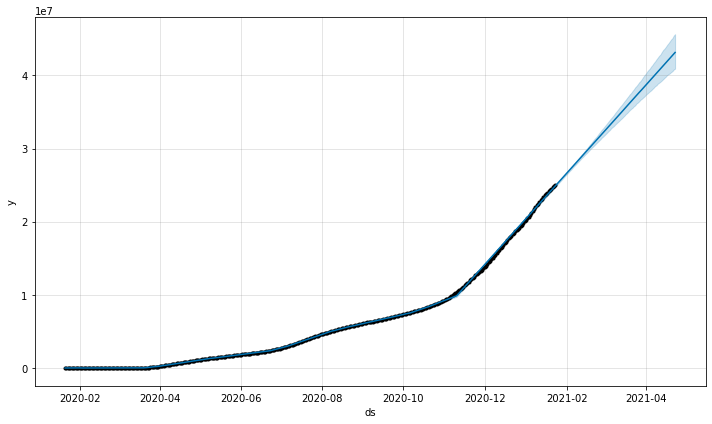

In [42]:
case_future_graph = case_prophet.plot(case_forecast)


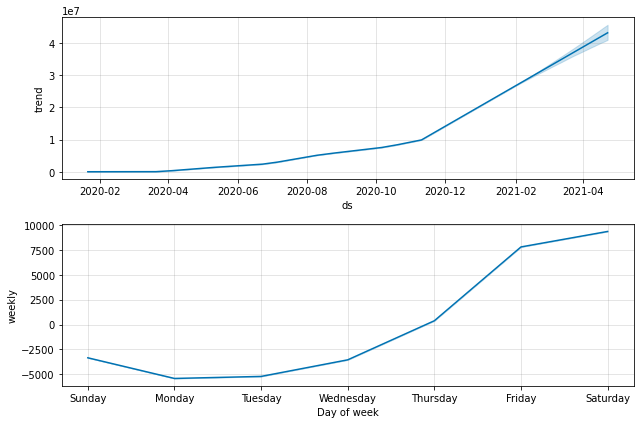

In [43]:
case_trend_and_weekly = case_prophet.plot_components(case_forecast)


## FB Prophet for Death

In [44]:
death_prophet = Prophet()
death_prophet.fit(death_fb_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
death_future_dates = death_prophet.make_future_dataframe(periods=90)
death_future_dates.tail()


,ds
454,2021-04-19
455,2021-04-20
456,2021-04-21
457,2021-04-22
458,2021-04-23


In [46]:
death_forecast = death_prophet.predict(death_future_dates)
death_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
454,2021-04-19,602699.012795,552933.883768,652548.447175
455,2021-04-20,605369.897853,555084.112993,654842.017840
456,2021-04-21,608091.665601,556097.193989,658097.780831
457,2021-04-22,610675.582991,558278.744392,659637.937247
458,2021-04-23,613153.330647,558649.829960,664732.329757


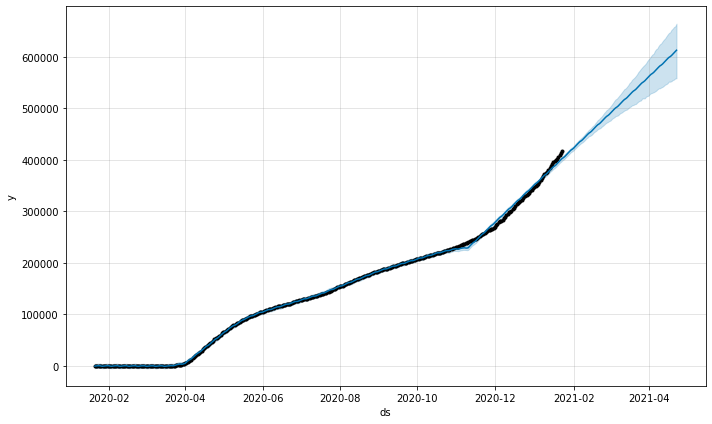

In [47]:
death_future_graph = death_prophet.plot(death_forecast)


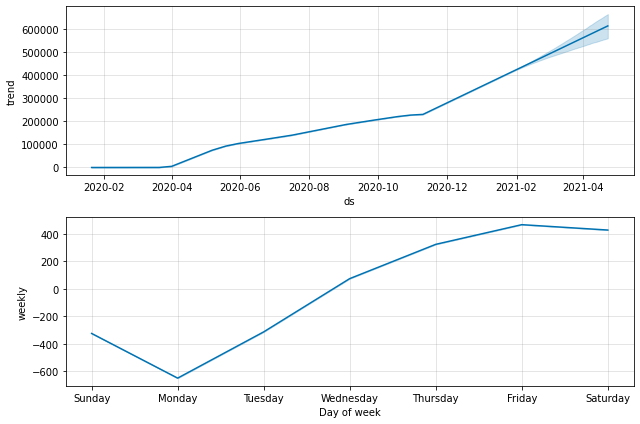

In [48]:
death_trend_and_weekly = death_prophet.plot_components(death_forecast)
